In [1]:
import torch
import numpy as np
import chess
from env.env import *
import sys
import chess.svg as svg
import svgutils.transform as sg
import cairosvg
from PIL import Image
import os

In [2]:
# board = chess.Board("5n2/4P3/1k6/8/8/6K1/8/8 w - - 0 30")

In [3]:
# now we will try to actually make some players to play the game
board = setupBoard()
cboard = chess.Board()
N = 8
M = 14
L = 7
T = 8
nMoves = 73

In [4]:
history = torch.zeros([1, N, N, M+L])
currentBoard = torch.zeros([N, N, M*T+L])
history[0, ...] = board
currentBoard[:, :, (M*(T-1)):] = board

In [5]:
print(boardStr(board))

r n b q k b n r
p p p p p p p p
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
P P P P P P P P
R N B Q K B N R


In [6]:
print(cboard)

r n b q k b n r
p p p p p p p p
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
P P P P P P P P
R N B Q K B N R


In [86]:
def makeMove(board, cboard):
    legalMvs = list(cboard.legal_moves)
    actionMask = toMask(legalMvs)

    probs = (actionMask/actionMask.sum()).numpy()
    a = np.random.choice(np.arange(probs.size), p=probs.ravel())
    a = np.unravel_index(a, probs.shape)

    pieceInds = board[a[0], a[1], :12]
    if sum(pieceInds) > 1:
        sys.exit(f"current board is \n{cboard}\n planning to move piece on {a[:2]}, but there are multiple pieces there: pieceInds is {pieceInds}")
#     print(torch.where(pieceInds==1)[0])
    pieceInd = torch.where(pieceInds == 1)[0].item()
    piece = (pieceInd % 6) + 1
    mv, promotion = toMove(np.array(a), piece, int(pieceInd/2))
    if mv not in set(legalMvs):
        sys.exit(f"current board \n{cboard}\n candidate mv is {mv}, which is not in legalMvs {legalMvs}")

    en_passant = cboard.is_en_passant(mv)
    castling = cboard.is_castling(mv)
    toGd = sqToGd(mv.to_square)
    board[a[0], a[1], :12] = 0
    board[toGd[0], toGd[1], :12] = 0
    if promotion:
        if toGd[0] == 0:
            board[toGd[0], toGd[1], promotion-1] = 1
        elif toGd[0] == 7:
            board[toGd[0], toGd[1], 6+promotion-1] = 1
        else:
            sys.exit(f"board is \n{cboard}\n promotion piece is {'NBRQ'[promotion-2]}, fromGd is {sqToGd(mv.from_square)}, but toGd is {toGd}")
    elif en_passant:
        assert piece == 1
        board[toGd[0], toGd[1], pieceInd] = 1
        c_ind = [a[0], toGd[1]]
        c_piece_ind = torch.where(board[c_ind[0], c_ind[1], :12] == 1)[0].item()
        assert c_piece_ind % 6 == 0
        board[c_ind[0], c_ind[1], :12] = 0
    elif castling:
        board[toGd[0], toGd[1], pieceInd] = 1
        r_ind = int(pieceInd/6)*6 + 3
        if toGd[1] == 6:
            assert board[toGd[0], 7, r_ind] == 1
            board[toGd[0], 7, r_ind] = 0
            board[toGd[0], 5, r_ind] = 1
        elif toGd[1] == 2:
            assert board[toGd[0], 0, r_ind] == 1
            board[toGd[0], 0, r_ind] = 0
            board[toGd[0], 3, r_ind] = 1
        else:
            sys.exit(f"current board is \n{cboard}\n castling move {mv}, but castling to wrong sq")
    else:
        board[toGd[0], toGd[1], pieceInd] = 1
        
    cboard.push(mv)
    if boardStr(board) != f"{cboard}":
        sys.exit(f"the boards are differen! tensor board: \n{boardStr(board)}\n chess board \n{cboard}\n last move was {mv}")

In [103]:
result_count = {}

In [107]:
for k in range(1000):
    print(f"playing game {k}")
    i = 0
    board = setupBoard()
    cboard = chess.Board()
    while True:
        if cboard.is_game_over():
            key = cboard.outcome().termination
            if key in result_count:
                result_count[key] += 1
            else:
                result_count[key] = 0
            break
        i += 5
        makeMove(board, cboard)
    #     board_svg = chess.svg.board(cboard, lastmove=cboard.peek(), size=300)
    #     cairosvg.svg2png(bytestring=board_svg, write_to=f'game/move_{i}.png')
#         if i % 200 == 0:
#             print(f'made {i/5} moves')

playing game 0
playing game 1
playing game 2
playing game 3
playing game 4
playing game 5
playing game 6
playing game 7
playing game 8
playing game 9
playing game 10
playing game 11
playing game 12
playing game 13
playing game 14
playing game 15
playing game 16
playing game 17
playing game 18
playing game 19
playing game 20
playing game 21
playing game 22
playing game 23
playing game 24
playing game 25
playing game 26
playing game 27
playing game 28
playing game 29
playing game 30
playing game 31
playing game 32
playing game 33
playing game 34
playing game 35
playing game 36
playing game 37
playing game 38
playing game 39
playing game 40
playing game 41
playing game 42
playing game 43
playing game 44
playing game 45
playing game 46
playing game 47
playing game 48
playing game 49
playing game 50
playing game 51
playing game 52
playing game 53
playing game 54
playing game 55
playing game 56
playing game 57
playing game 58
playing game 59
playing game 60
playing game 61
playing game 62
pl

playing game 489
playing game 490
playing game 491
playing game 492
playing game 493
playing game 494
playing game 495
playing game 496
playing game 497
playing game 498
playing game 499
playing game 500
playing game 501
playing game 502
playing game 503
playing game 504
playing game 505
playing game 506
playing game 507
playing game 508
playing game 509
playing game 510
playing game 511
playing game 512
playing game 513
playing game 514
playing game 515
playing game 516
playing game 517
playing game 518
playing game 519
playing game 520
playing game 521
playing game 522
playing game 523
playing game 524
playing game 525
playing game 526
playing game 527
playing game 528
playing game 529
playing game 530
playing game 531
playing game 532
playing game 533
playing game 534
playing game 535
playing game 536
playing game 537
playing game 538
playing game 539
playing game 540
playing game 541
playing game 542
playing game 543
playing game 544
playing game 545
playing game 546
playing game 5

playing game 971
playing game 972
playing game 973
playing game 974
playing game 975
playing game 976
playing game 977
playing game 978
playing game 979
playing game 980
playing game 981
playing game 982
playing game 983
playing game 984
playing game 985
playing game 986
playing game 987
playing game 988
playing game 989
playing game 990
playing game 991
playing game 992
playing game 993
playing game 994
playing game 995
playing game 996
playing game 997
playing game 998
playing game 999


In [108]:
result_count

{<Termination.INSUFFICIENT_MATERIAL: 3>: 681,
 <Termination.SEVENTYFIVE_MOVES: 4>: 122,
 <Termination.CHECKMATE: 1>: 147,
 <Termination.STALEMATE: 2>: 56}

In [32]:
all_moves

[Move.from_uci('g2g4'),
 Move.from_uci('h7h6'),
 Move.from_uci('f2f3'),
 Move.from_uci('f7f6'),
 Move.from_uci('d2d4'),
 Move.from_uci('d7d5'),
 Move.from_uci('e2e3'),
 Move.from_uci('b8c6'),
 Move.from_uci('f3f4'),
 Move.from_uci('b7b6'),
 Move.from_uci('d1d2'),
 Move.from_uci('a7a5'),
 Move.from_uci('g1e2'),
 Move.from_uci('c8a6'),
 Move.from_uci('e3e4'),
 Move.from_uci('e8d7'),
 Move.from_uci('b2b4'),
 Move.from_uci('d7e8'),
 Move.from_uci('f4f5'),
 Move.from_uci('a6b5'),
 Move.from_uci('f1g2'),
 Move.from_uci('a8a6'),
 Move.from_uci('e4e5'),
 Move.from_uci('d8d6'),
 Move.from_uci('a2a4'),
 Move.from_uci('f6e5'),
 Move.from_uci('e1d1'),
 Move.from_uci('d6f6'),
 Move.from_uci('d2e3'),
 Move.from_uci('b5a4'),
 Move.from_uci('e3f2'),
 Move.from_uci('a6a8'),
 Move.from_uci('g2d5'),
 Move.from_uci('g7g5'),
 Move.from_uci('f5g6')]

In [41]:
new_board = chess.Board()

In [42]:
i = 0

In [58]:
len(all_moves)

35

In [80]:
new_board.is_en_passant(all_moves[-1])

True

34


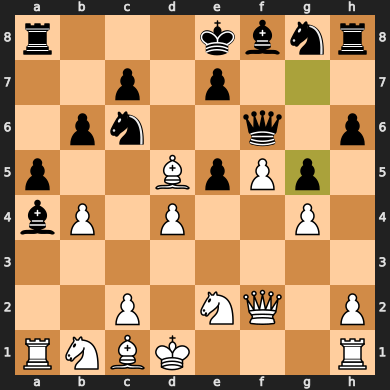

In [79]:
new_board.pop()
print(i)
new_board

In [25]:
file_list = os.listdir("./game")
img_list = []
for f in file_list:
    if f.startswith('move'):
        img_list.append(f'game/{f}')

img_index = [int(im.split('_')[1].split('.')[0]) for im in img_list]

sorted_ind = sorted(range(len(img_index)), key=img_index.__getitem__)

img_list = [img_list[i] for i in sorted_ind]

In [26]:
imgs = [Image.open(x) for x in img_list[-50:]]
widths, heights = zip(*(i.size for i in imgs))

total_height = sum(heights)
new_im = Image.new('RGB', (widths[0], total_height))

offset = 0
for im in imgs:
    new_im.paste(im, (0, offset))
    offset += im.size[1]
    
new_im.save('game.png')

In [ ]:
board_fen = 'rnbqkbnr/pp1ppppp/8/2p5/4P3/5N2/PPPP1PPP/RNBQKB1R b KQkq - 1 2'
board, col, castle, enp, fifty, nMv = board_fen.split(' ')
rows = board.split('/')

In [ ]:
col = 0 if col == 'w' else 1

In [ ]:
def setupPos(board_fen):
    b, color, castle, enp, fifty, nMv = board_fen.split(' ')
    rows = b.split('/')
    board = torch.zeros([N, N, M+L])
    pieceDict = {'P':0, 'N':1, 'B':2, 'R':3, 'Q':4, 'K':5}
    for i, row in enumerate(rows):
        j = 0
        for c in row:
            if c.isdigit():
                j += int(c)
            else:
                pieceInd = pieceDict[c] if c.isupper() else 6+pieceDict[c.upper()]
                board[i, j, pieceInd] = 1
                j += 1
    return board

In [ ]:
board = setupPos('5n2/4P3/1k6/8/8/6K1/8/8 b KQkq - 1 2')